In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import scikit_posthocs as sp
from scipy.stats import kruskal
from typing import Tuple

In [44]:
def cliffs_delta(x: pd.Series, y: pd.Series) -> Tuple[float, str]:
    """
    Compute Cliff's Delta and return interpretation.
    """
    nx = len(x)
    ny = len(y)
    greater = sum(xi > yj for xi in x for yj in y)
    less = sum(xi < yj for xi in x for yj in y)
    delta = (greater - less) / (nx * ny)

    abs_delta = abs(delta)
    if abs_delta < 0.147:
        interpretation = "negligible"
    elif abs_delta < 0.33:
        interpretation = "small"
    elif abs_delta < 0.474:
        interpretation = "medium"
    else:
        interpretation = "large"
    return delta, interpretation

In [3]:
df_data = pd.read_csv("../processed_data/1_processed_data.csv")
df_data.head(5)

,ID,Attachment,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,1,Insecure,Male,20.076728,31.719207,23.453752,25.016903,21.765240,28.368055,6.602815
1,4,Secure,Male,28.584920,82.400761,28.361209,19.363161,28.473065,50.881961,22.408896
2,5,Secure,Female,161.424693,46.867951,39.006348,52.728307,100.215520,49.798129,-50.417391
3,7,Insecure,Female,26.747838,47.213491,21.599136,35.942378,24.173487,41.577934,17.404447
4,11,NaN,Male,118.901337,47.213491,37.125222,382.715268,78.013279,214.964380,136.951100


In [5]:
df_data.shape

(35, 10)

In [4]:
df_data["Attachment"].value_counts()

Secure      18
Insecure     9
Name: Attachment, dtype: int64

In [6]:
df_data_clean = df_data.dropna()
df_data_clean.shape

(27, 10)

In [8]:
df_data_clean = df_data_clean[["ID", "Attachment", "Gender", "Average IgA Morning",
                               "Average IgA Afternoon", "Average Difference IgA"]]
df_data_clean.head(5)

,ID,Attachment,Gender,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,1,Insecure,Male,21.765240,28.368055,6.602815
1,4,Secure,Male,28.473065,50.881961,22.408896
2,5,Secure,Female,100.215520,49.798129,-50.417391
3,7,Insecure,Female,24.173487,41.577934,17.404447
5,12,Secure,Female,29.554870,45.078186,15.523316


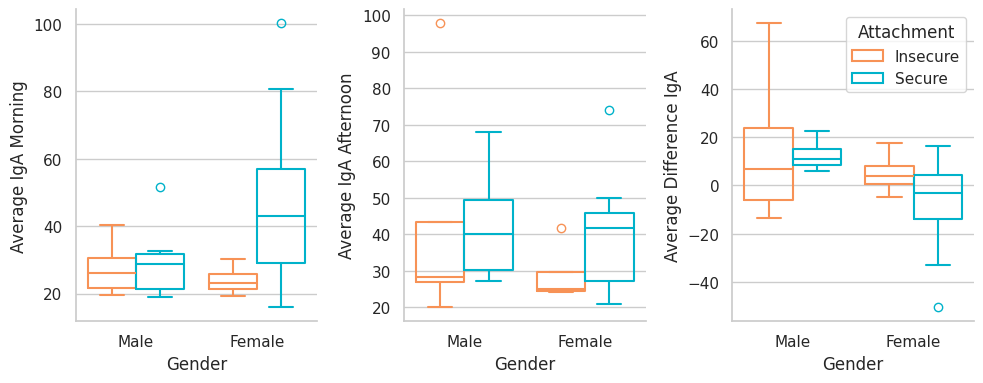

In [29]:
sns.set(style="whitegrid", font_scale=1)

palette = {"Secure": "#00B2CA", "Insecure": "#F79256"}

f, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True)

sns.boxplot(
    data=df_data_clean, 
    y="Average IgA Morning", 
    hue="Attachment", 
    x="Gender", 
    ax=axes[0], 
    fill=False,
    palette=palette, 
    legend=False)

sns.boxplot(
    data=df_data_clean, 
    y="Average IgA Afternoon", 
    hue="Attachment", 
    x="Gender", 
    ax=axes[1], 
    fill=False, 
    palette=palette,
    legend=False)

sns.boxplot(
    data=df_data_clean, 
    y="Average Difference IgA", 
    hue="Attachment", 
    x="Gender", 
    ax=axes[2], 
    palette=palette,
    fill=False)

sns.despine()
plt.tight_layout()


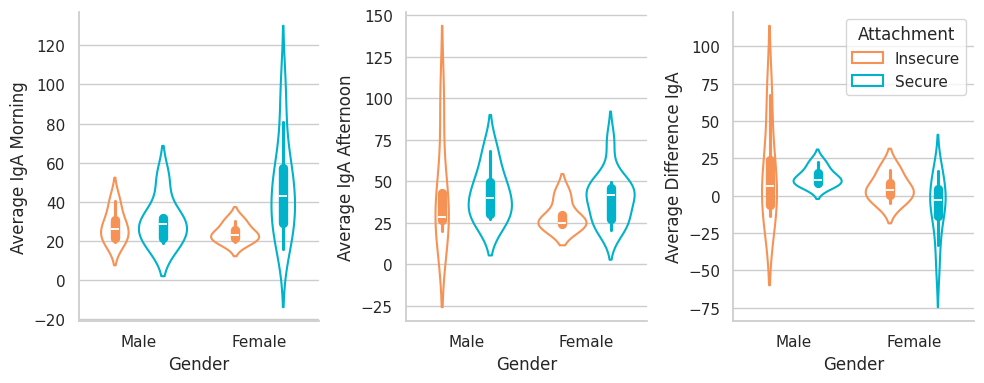

In [42]:
sns.set(style="whitegrid", font_scale=1)

palette = {"Secure": "#00B2CA", "Insecure": "#F79256"}

f, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True)

sns.violinplot(
    data=df_data_clean, 
    y="Average IgA Morning", 
    hue="Attachment", 
    x="Gender", 
    ax=axes[0], 
    fill=False,
    palette=palette, 
    legend=False)

sns.violinplot(
    data=df_data_clean, 
    y="Average IgA Afternoon", 
    hue="Attachment", 
    x="Gender", 
    ax=axes[1], 
    fill=False, 
    palette=palette,
    legend=False)

sns.violinplot(
    data=df_data_clean, 
    y="Average Difference IgA", 
    hue="Attachment", 
    x="Gender", 
    ax=axes[2], 
    palette=palette,
    fill=False)

sns.despine()
plt.tight_layout()


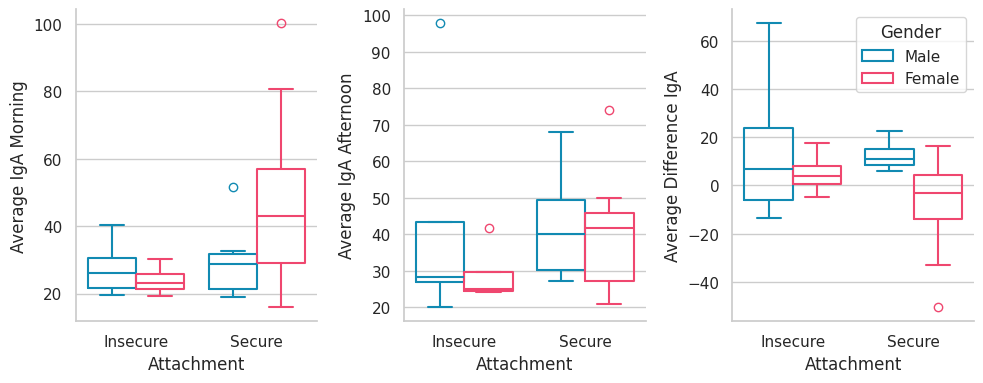

In [31]:
sns.set(style="whitegrid", font_scale=1)

palette = {"Male": "#118AB2", "Female": "#EF476F"}

f, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True)

sns.boxplot(
    data=df_data_clean, 
    y="Average IgA Morning", 
    x="Attachment", 
    hue="Gender", 
    ax=axes[0], 
    fill=False,
    palette=palette, 
    legend=False)

sns.boxplot(
    data=df_data_clean, 
    y="Average IgA Afternoon", 
    x="Attachment", 
    hue="Gender", 
    ax=axes[1], 
    fill=False, 
    palette=palette,
    legend=False)

sns.boxplot(
    data=df_data_clean, 
    y="Average Difference IgA", 
    x="Attachment", 
    hue="Gender", 
    ax=axes[2], 
    palette=palette,
    fill=False)

sns.despine()
plt.tight_layout()

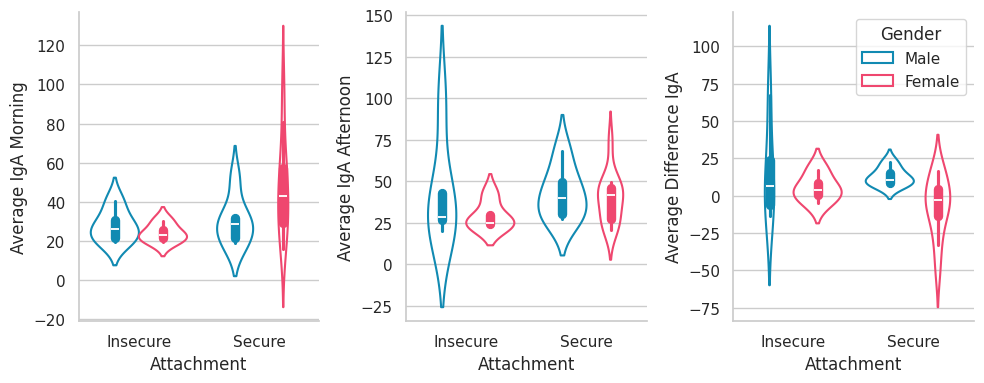

In [41]:
sns.set(style="whitegrid", font_scale=1)

palette = {"Male": "#118AB2", "Female": "#EF476F"}

f, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True)

sns.violinplot(
    data=df_data_clean, 
    y="Average IgA Morning", 
    x="Attachment", 
    hue="Gender", 
    ax=axes[0], 
    fill=False,
    palette=palette, 
    legend=False)

sns.violinplot(
    data=df_data_clean, 
    y="Average IgA Afternoon", 
    x="Attachment", 
    hue="Gender", 
    ax=axes[1], 
    fill=False, 
    palette=palette,
    legend=False)

sns.violinplot(
    data=df_data_clean, 
    y="Average Difference IgA", 
    x="Attachment", 
    hue="Gender", 
    ax=axes[2], 
    palette=palette,
    fill=False)

sns.despine()
plt.tight_layout()

In [35]:
iga_vars = ["Average IgA Morning", "Average IgA Afternoon", "Average Difference IgA"]

gender_results = []
for var in iga_vars:
    male_vals = df_data_clean[df_data_clean["Gender"] == "Male"][var]
    female_vals = df_data_clean[df_data_clean["Gender"] == "Female"][var]
    stat, p = mannwhitneyu(male_vals, female_vals, alternative='two-sided')
    statistic_result = {"variable": var, "U statistic": stat, "p-value": p}
    gender_results.append(statistic_result)

gender_results = pd.DataFrame(gender_results)
gender_results["reject"] = gender_results["p-value"]<=0.05
gender_results

,variable,U statistic,p-value,reject
0,Average IgA Morning,60.0,0.174773,False
1,Average IgA Afternoon,102.0,0.505299,False
2,Average Difference IgA,130.0,0.040572,True


In [37]:
attachment_results = []
for var in iga_vars:
    secure_vals = df_data_clean[df_data_clean["Attachment"] == "Secure"][var]
    insecure_vals = df_data_clean[df_data_clean["Attachment"] == "Insecure"][var]
    stat, p = mannwhitneyu(secure_vals, insecure_vals, alternative='two-sided')
    statistic_result = {"variable": var, "U statistic": stat, "p-value": p}
    attachment_results.append(statistic_result)

attachment_results = pd.DataFrame(attachment_results)
attachment_results["reject"] = attachment_results["p-value"]<=0.05
attachment_results

,variable,U statistic,p-value,reject
0,Average IgA Morning,116.0,0.075982,False
1,Average IgA Afternoon,109.0,0.157231,False
2,Average Difference IgA,68.0,0.520269,False


In [40]:
df_data_clean["Group"] = df_data_clean["Attachment"] + " - " + df_data_clean["Gender"]

iga_vars = [
    "Average IgA Morning",
    "Average IgA Afternoon",
    "Average Difference IgA"
]

kruskal_results = {}
for var in iga_vars:
    data = [group[var].values for name, group in df_data_clean.groupby("Group")]
    stat, p = kruskal(*data)
    kruskal_results[var] = {"H statistic": stat, "p-value": p}
kruskal_df = pd.DataFrame(kruskal_results).T

print("=== Kruskal–Wallis Results ===")
print(kruskal_df)

# Post-hoc Dunn test with Holm correction
print("\n=== Dunn's Test (Holm-corrected p-values) ===")
for var in iga_vars:
    print(f"\n--- {var} ---")
    posthoc = sp.posthoc_dunn(
        df_data_clean,
        val_col=var,
        group_col="Group",
        p_adjust='holm'
    )
    print(posthoc)

=== Kruskal–Wallis Results ===
                        H statistic   p-value
Average IgA Morning        6.066667  0.108411
Average IgA Afternoon      3.240741  0.355976
Average Difference IgA     5.740741  0.124928

=== Dunn's Test (Holm-corrected p-values) ===

--- Average IgA Morning ---
                   Insecure - Female  Insecure - Male  Secure - Female  \
Insecure - Female           1.000000         1.000000         0.250081   
Insecure - Male             1.000000         1.000000         0.516332   
Secure - Female             0.250081         0.516332         1.000000   
Secure - Male               1.000000         1.000000         0.516332   

                   Secure - Male  
Insecure - Female       1.000000  
Insecure - Male         1.000000  
Secure - Female         0.516332  
Secure - Male           1.000000  

--- Average IgA Afternoon ---
                   Insecure - Female  Insecure - Male  Secure - Female  \
Insecure - Female           1.000000              1.0     

In [48]:
gender_cliffs = []
for var in iga_vars:
    male = df_data_clean[df_data_clean["Gender"] == "Male"][var]
    female = df_data_clean[df_data_clean["Gender"] == "Female"][var]
    delta, interp = cliffs_delta(male, female)
    gender_cliffs.append({"variable": var, "Cliff's Delta": delta, "Interpretation": interp})

gender_cliffs = pd.DataFrame(gender_cliffs)
gender_cliffs

,variable,Cliff's Delta,Interpretation
0,Average IgA Morning,-0.318182,small
1,Average IgA Afternoon,0.159091,small
2,Average Difference IgA,0.477273,large


In [49]:
gender_results.merge(right=gender_cliffs, on="variable")

,variable,U statistic,p-value,reject,Cliff's Delta,Interpretation
0,Average IgA Morning,60.0,0.174773,False,-0.318182,small
1,Average IgA Afternoon,102.0,0.505299,False,0.159091,small
2,Average Difference IgA,130.0,0.040572,True,0.477273,large


In [50]:
attachment_cliffs = []
for var in iga_vars:
    secure = df_data_clean[df_data_clean["Attachment"] == "Secure"][var]
    insecure = df_data_clean[df_data_clean["Attachment"] == "Insecure"][var]
    delta, interp = cliffs_delta(insecure, secure)
    attachment_cliffs.append({"variable": var, "Cliff's Delta": delta, "Interpretation": interp})

attachment_cliffs = pd.DataFrame(attachment_cliffs)
attachment_cliffs

,variable,Cliff's Delta,Interpretation
0,Average IgA Morning,-0.432099,medium
1,Average IgA Afternoon,-0.345679,medium
2,Average Difference IgA,0.160494,small


In [51]:
attachment_results.merge(right=attachment_cliffs, on="variable")

,variable,U statistic,p-value,reject,Cliff's Delta,Interpretation
0,Average IgA Morning,116.0,0.075982,False,-0.432099,medium
1,Average IgA Afternoon,109.0,0.157231,False,-0.345679,medium
2,Average Difference IgA,68.0,0.520269,False,0.160494,small


In [52]:
combined_cliffs = {}
grouped = df_data_clean.groupby(["Attachment", "Gender"])
groups = list(grouped.groups.keys())

if len(groups) >= 2:
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            g1, g2 = groups[i], groups[j]
            label = f"{g1} vs {g2}"
            results = {}
            for var in iga_vars:
                data1 = grouped.get_group(g1)[var]
                data2 = grouped.get_group(g2)[var]
                if len(data1) > 0 and len(data2) > 0:
                    delta, interp = cliffs_delta(data1, data2)
                    results[var] = {"Cliff's Delta": delta, "Interpretation": interp}
            combined_cliffs[label] = results

combined_cliffs_df = pd.concat({k: pd.DataFrame(v).T for k, v in combined_cliffs.items()}, names=["Group Comparison", "Variable"])
combined_cliffs_df

Cliff's Delta  \
Group Comparison                               Variable                               
('Insecure', 'Female') vs ('Insecure', 'Male') Average IgA Morning             -0.3   
                                               Average IgA Afternoon           -0.4   
                                               Average Difference IgA          -0.1   
('Insecure', 'Female') vs ('Secure', 'Female') Average IgA Morning        -0.666667   
                                               Average IgA Afternoon      -0.416667   
                                               Average Difference IgA      0.458333   
('Insecure', 'Female') vs ('Secure', 'Male')   Average IgA Morning        -0.166667   
                                               Average IgA Afternoon          -0.75   
                                               Average Difference IgA     -0.583333   
('Insecure', 'Male') vs ('Secure', 'Female')   Average IgA Morning        -0.566667   
                                               Average IgA Afternoon      -0.133333   
                                               Average Difference IgA      0.366667   
('Insecure', 'Male') vs ('Secure', 'Male')     Average IgA Morning              0.0   
                                               Average IgA Afternoon      -0.333333   
                                               Average Difference IgA     -0.133333   
('Secure', 'Female') vs ('Secure', 'Male')     Average IgA Morning         0.444444   
                                               Average IgA Afternoon      -0.138889   
                                               Average Difference IgA     -0.638889   

                                                                      Interpretation  
Group Comparison                               Variable                               
('Insecure', 'Female') vs ('Insecure', 'Male') Average IgA Morning             small  
                                               Average IgA Afternoon          medium  
                                               Average Difference IgA     negligible  
('Insecure', 'Female') vs ('Secure', 'Female') Average IgA Morning             large  
                                               Average IgA Afternoon          medium  
                                               Average Difference IgA         medium  
('Insecure', 'Female') vs ('Secure', 'Male')   Average IgA Morning             small  
                                               Average IgA Afternoon           large  
                                               Average Difference IgA          large  
('Insecure', 'Male') vs ('Secure', 'Female')   Average IgA Morning             large  
                                               Average IgA Afternoon      negligible  
                                               Average Difference IgA         medium  
('Insecure', 'Male') vs ('Secure', 'Male')     Average IgA Morning        negligible  
                                               Average IgA Afternoon          medium  
                                               Average Difference IgA     negligible  
('Secure', 'Female') vs ('Secure', 'Male')     Average IgA Morning            medium  
                                               Average IgA Afternoon      negligible  
                                               Average Difference IgA          large